In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
# Import raw game results data
game_result1314 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results13-14.csv')
game_result1415 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results14-15.csv')
game_result1516 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results15-16.csv')
game_result1617 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results16-17.csv')
game_result1718 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results17-18.csv')


In [4]:
# Select needed columns

game_result1314 = game_result1314[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1415 = game_result1415[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1516 = game_result1516[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1617 = game_result1617[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1718 = game_result1718[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]


In [5]:
# Merge all dataframes
merged_df = pd.concat([game_result1314, game_result1415, game_result1516,\
                       game_result1617, game_result1718], axis = 0)

In [6]:
# Make a copy of data frame
backup = merged_df
merged_df = backup

In [7]:
# Creat a new column about game result 1, 0
def get_results(row):
    return int(row['PTS.1'] > row['PTS'])

In [8]:
# Creat a new column about score gap
def get_scoregap(row):
    return int(abs(row['PTS.1'] - row['PTS']))

merged_df['score_gap'] = merged_df.apply(get_scoregap, axis = 1)

In [9]:
# Elo ranking system
# s is the result of team 1, team 1 is home team
def cal_elo(e1, e2, s):
    exp1 = 1 / (1 + 10**((e2-e1-20)/400))
    exp2 = 1 / (1 + 10**((e1+20-e2)/400))
    if e1 > 1600:
        k = 12
    elif e1 > 1400:
        k = 20
    else:
        k = 24
    e1_new = e1 + k * (s - exp1)
    if e2 > 1600:
        k = 12
    elif e2 > 1400:
        k = 20
    else:
        k = 24
    e2_new = e2 + k * ((1-s) - exp2)
    return e1_new, e2_new


In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 20 20:53:55 2018

@author: liuhangyu
"""
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
# Import raw game results data
game_result1314 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results13-14.csv')
game_result1415 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results14-15.csv')
game_result1516 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results15-16.csv')
game_result1617 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results16-17.csv')
game_result1718 = pd.read_csv('/Users/weijiaheng/Desktop/Project /Game_results17-18.csv')

# Select needed columns

game_result1314 = game_result1314[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1415 = game_result1415[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1516 = game_result1516[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1617 = game_result1617[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

game_result1718 = game_result1718[['Date', 'Start (ET)', 'Visitor/Neutral',\
                                   'PTS', 'Home/Neutral', 'PTS.1', \
                                   'Unnamed: 7']]

# Merge all dataframes
merged_df = pd.concat([game_result1314, game_result1415, game_result1516,\
                       game_result1617, game_result1718], axis = 0)

# Reindex the merged dataframe
merged_df = merged_df.reset_index(drop = True)

merged_df['elo_away'] = 1500

merged_df['elo_home'] = 1500

# Make a copy of data frame
backup = merged_df
merged_df = backup

# Creat a new column about game result 1, 0
def get_results(row):
    return int(row['PTS.1'] > row['PTS'])
    
merged_df['results'] = merged_df.apply(get_results, axis = 1)

# Creat a new column about score gap
def get_scoregap(row):
    return int(abs(row['PTS.1'] - row['PTS']))

merged_df['score_gap'] = merged_df.apply(get_scoregap, axis = 1)

# Elo ranking system
# s is the result of team 1, team 1 is home team
def cal_elo(e1, e2, s):
    exp1 = 1 / (1 + 10**((e2-e1-20)/400))
    exp2 = 1 / (1 + 10**((e1+20-e2)/400))
    if e1 > 1600:
        k = 12
    elif e1 > 1400:
        k = 20
    else:
        k = 24
    e1_new = e1 + k * (s - exp1)
    if e2 > 1600:
        k = 12
    elif e2 > 1400:
        k = 20
    else:
        k = 24
    e2_new = e2 + k * ((1-s) - exp2)
    return e1_new, e2_new


# Change Charlotte hornet and charlotte bobcats
names_list = list(pd.unique(merged_df['Home/Neutral']))
merged_df['Home/Neutral'] = merged_df['Home/Neutral'].apply(lambda x: \
         re.sub('Charlotte Bobcats', 'Charlotte Hornets', x))
merged_df['Visitor/Neutral'] = merged_df['Visitor/Neutral'].apply(lambda x: \
         re.sub('Charlotte Bobcats', 'Charlotte Hornets', x))
names_list = list(pd.unique(merged_df['Home/Neutral']))

# Make a new table to save elo score for each team
elo_df = pd.DataFrame(index = names_list)
elo_df['elo_score'] = 1500

# Update elo score according to the result of each game
season_end = [1318, 2629, 3945, 5254]

'''
for i in range(len(merged_df)):
    # calculate new elo score for each team
    e1 = int(elo_df.loc[merged_df['Home/Neutral'][i]])
    e2 = int(elo_df.loc[merged_df['Visitor/Neutral'][i]])
    s = merged_df['results'][i]
    e1_new, e2_new = cal_elo(e1,e2,s)
    # updata elo data frame
    elo_df.loc[merged_df['Home/Neutral'][i]] = e1_new
    elo_df.loc[merged_df['Visitor/Neutral'][i]] = e2_new
    # if it is season end, update all elo score to 75%
    if i in season_end:
        mean_last = elo_df['elo_score'].mean()
        elo_df['elo_score'] = elo_df['elo_score'].apply(lambda x:\
              x * 0.75 + 0.25 * mean_last)
    # update columns in merged data frame
    merged_df['elo_home'][i] = e1_new
    merged_df['elo_away'][i] = e2_new
'''
merged_df['index_copy'] = pd.Series(merged_df.index)

def elos(row):
    home_team, away_team = row['Home/Neutral'], row['Visitor/Neutral']
    e1 = int(elo_df.loc[home_team])
    e2 = int(elo_df.loc[away_team])
    s = row['results']
    e1_new, e2_new = cal_elo(e1, e2, s)
    elo_df.loc[home_team] = e1_new
    elo_df.loc[away_team] = e2_new
    if row['index_copy'] in season_end:
        elo_df['elo_score'] = elo_df['elo_score'].apply(lambda x:\
              x * 1.03)
    return [e1_new, e2_new]

merged_df['elos'] = merged_df.apply(elos, axis = 1)
 
merged_df['elo_home'] = merged_df['elos'].apply(lambda x: x[0])

merged_df['elo_away'] = merged_df['elos'].apply(lambda x: x[1])

merged_df.to_csv('/Users/weijiaheng/Desktop/Project /elo.csv',\
                  index = False, encoding = 'utf-8',header=True)

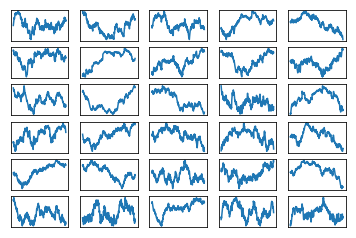

In [23]:
# Visulization    
def extract_elo(row, team_name):
    if row['Home/Neutral'] == team_name:
        return row['elo_home']
    elif row['Visitor/Neutral'] == team_name:
        return row['elo_away']
    else:
        return 0

elo_byteam = []   
 
for name in names_list:
    elo_byteam.append(merged_df.apply(extract_elo, team_name=name, axis = 1))

for i in range(len(elo_byteam)):
    elo_byteam[i] = elo_byteam[i][elo_byteam[i] > 0]
    elo_byteam[i] = elo_byteam[i].reset_index(drop = True)

for i in range(len(elo_byteam)):
    plt.subplot(6,5,i+1)
    plt.plot(elo_byteam[i])
    plt.xticks([])
    plt.yticks([])
    #plt.legend(names_list[i])